<a href="https://colab.research.google.com/github/Naza04/Tugas/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('Kumpulan_Bunga.zip'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import zipfile
import os

In [3]:
# Define the path to the zip file and the directory where it will be unzipped
zip_file_path = 'Kumpulan_Bunga.zip'
unzip_dir = 'Kumpulan_Bunga'

In [4]:
# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [5]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [6]:
# Mendefinisikan jalur direktori dataset
train_dir = 'Kumpulan_Bunga'
test_dir = 'Kumpulan_Bunga'

In [7]:
# Menghitung jumlah kelas
num_classes = len(os.listdir(train_dir))
print(f"Jumlah kelas: {num_classes}")

Jumlah kelas: 2


In [8]:
# Mengatur parameter-model
input_shape = (150, 150, 3)

In [9]:
# Membangun arsitektur CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [10]:
# Mempersiapkan data pelatihan dan pengujian menggunakan ImageDataGenerator
batch_size = 32
epochs = 2

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 195 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [11]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mae', 'mape'])

In [12]:
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=epochs,
          validation_data=test_generator,
          validation_steps=len(test_generator))

Epoch 1/2
7/7 [==============================] - 25s 3s/step - loss: 0.4163 - accuracy: 0.7949 - mae: 0.2888 - mape: 144395296.0000 - val_loss: 0.0709 - val_accuracy: 0.9744 - val_mae: 0.0434 - val_mape: 21683358.0000
Epoch 2/2
7/7 [==============================] - 21s 3s/step - loss: 0.0638 - accuracy: 0.9846 - mae: 0.0300 - mape: 15004780.0000 - val_loss: 0.0133 - val_accuracy: 1.0000 - val_mae: 0.0129 - val_mape: 6467092.5000


In [13]:
model.save('Hasil_klasifikasi')

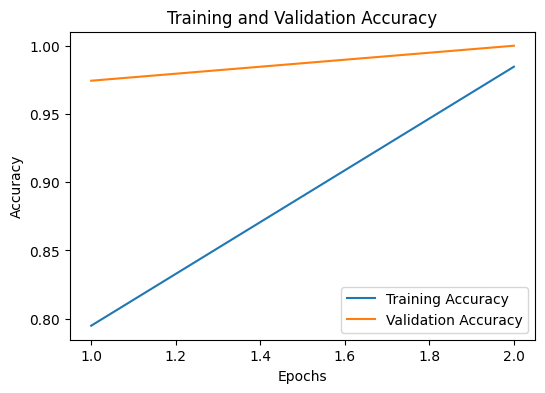

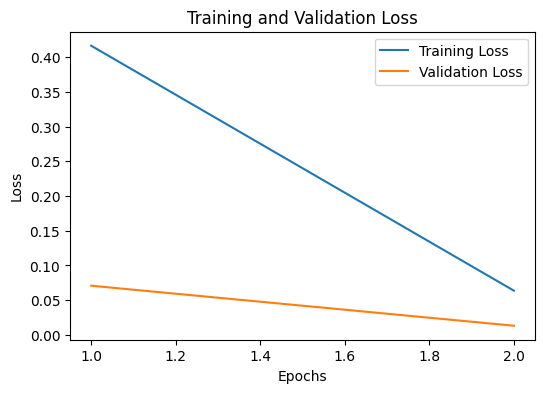

In [25]:
# Mendapatkan history akurasi dan loss
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Menghasilkan plot akurasi
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Menghasilkan plot loss
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [15]:
#Menghitung Nilai MAE dan MAPE

In [16]:
test_mape = model.evaluate(test_generator, steps=len(test_generator))

7/7 [==============================] - 6s 773ms/step - loss: 0.0133 - accuracy: 1.0000 - mae: 0.0129 - mape: 6467093.0000


In [17]:
len(test_mape)
test_mape

[0.013296881690621376, 1.0, 0.012934201397001743, 6467093.0]

In [18]:
# Menghitung nilai MAE dan MAPE pada data pengujian
test_loss, _, test_mae, test_mape = model.evaluate(test_generator, steps=len(test_generator))

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")

7/7 [==============================] - 6s 856ms/step - loss: 0.0133 - accuracy: 1.0000 - mae: 0.0129 - mape: 6467093.5000
Test Loss: 0.013296885415911674
Test MAE: 0.012934203259646893
Test MAPE: 6467093.5


In [19]:
def predict_flower(image_path, model_path, train_generator):
    # Memuat model yang telah disimpan
    model = tf.keras.models.load_model(model_path)

    # Memprediksi jenis bunga dari gambar baru
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
    img_array /= 255.0  # Normalisasi

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class = train_generator.class_indices

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('on')

    # Menampilkan label kelas prediksi
    for class_name, class_index in predicted_class.items():
        if class_index == predicted_class_index:
            predicted_label = class_name
            break

    plt.title(f"Predicted class: {predicted_label}")
    plt.show()

1/1 [==============================] - 0s 176ms/step


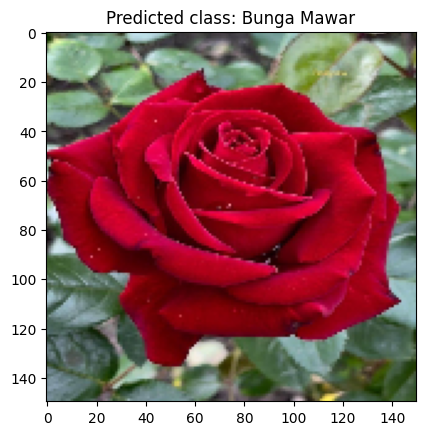

In [22]:
# Contoh penggunaan
img_path = 'Kumpulan_Bunga/Bunga Mawar/1.png'
model_path = 'Hasil_klasifikasi'
predict_flower(img_path, model_path, train_generator)

1/1 [==============================] - 0s 162ms/step


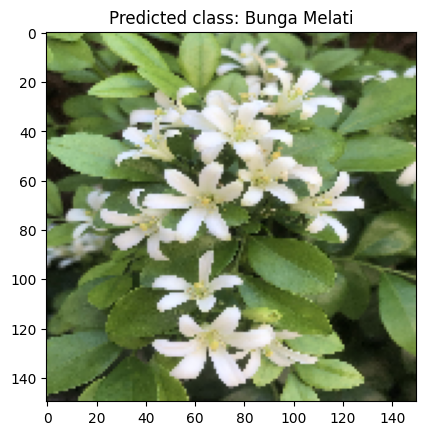

In [23]:
# Contoh penggunaan
img_path = 'Kumpulan_Bunga/Bunga Melati/100.jpg'
model_path = 'Hasil_klasifikasi'
predict_flower(img_path, model_path, train_generator)